# 1- Perform the EDA on the Bank data.

# 2-Identify the task after observing the data that what sort of analysis can be peformed on this. 

#### We have to predict whether the person will deposit his money in bank or not based on different conditions

## EDA

### STEP 1:Importing libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
%matplotlib inline

### STEP 2:Loading dataset

In [2]:
df=pd.read_csv(r"C:\Users\111\Desktop\Projects\Bank Data Analysis\bankdata.csv")


### STEP 3:Checking for first 10 rows

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


### STEP 4:Exploring dimensions of data

In [4]:
df.shape

(11162, 17)

#### It can clearly be shown that the data has 11162 rows and 17 columns

### STEP 5:Finding characteristics of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### It can be seen that we don't have null values

### STEP 6:Finding statistical characteristics of data

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### STEP 7:Handling missing values

In [7]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

#### We don't have missing values so we won't do any analysis on it

### STEP 8:Checking for duplicate values

In [8]:
df_dv=df.duplicated()
print(df_dv.sum())
df[df_dv]

0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


#### It can be seen that we don't have any duplicate values

### STEP 9:Handling outliers

### 1)AGE

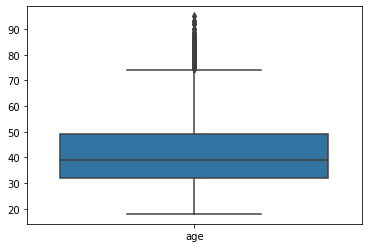

In [9]:
sns.boxplot(data=df[["age"]])
plt.show()

In [10]:
#IQR=Q3-Q1
def outliers_age(Q3,Q1,IQR):
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_age(49,32,17)

Lower bound: 6.5
Upper bound: 74.5


In [11]:
a=df["age"]
count=0
for i in a:
    if i>74.5 or i<6.5:
        count=count+1
print("total outliers in age are:",count)
percentage_of_ageoutliers=(count/11162)*100 
print("percentage of age outliers are:",percentage_of_ageoutliers)

total outliers in age are: 171
percentage of age outliers are: 1.5319835154990145


#### We won't drop age outliers since they might be useful and also they make up only 1.5% of the total data which is feasible

### 2)BALANCE

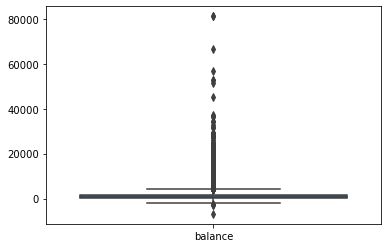

In [12]:
sns.boxplot(data=df[["balance"]])
plt.show()

In [13]:
#IQR=Q3-Q1
def outliers_balance(Q3,Q1,IQR):
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_age(1708,122,1586)

Lower bound: -2257.0
Upper bound: 4087.0


In [14]:
a1=df["balance"]
count=0
for i in a1:
    if i>4087 or i<-2257:
        count=count+1
print("total outliers in balance are:",count)
percentage_of_balanceoutliers=(count/11162)*100 
print("percentage of balance outliers are:",percentage_of_balanceoutliers)

total outliers in balance are: 1055
percentage of balance outliers are: 9.451711162874037


#### We won't drop balance outliers since they might be useful

### 3)DURATION

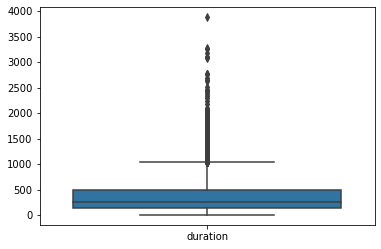

In [15]:
sns.boxplot(data=df[["duration"]])
plt.show()

In [16]:
#IQR=Q3-Q1
def outliers_duration(Q3,Q1,IQR):
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_age(496,138,358)

Lower bound: -399.0
Upper bound: 1033.0


In [17]:
a2=df["duration"]
count=0
for i in a2:
    if i>1033 or i<-399:
        count=count+1
print("total outliers in duration are:",count)
percentage_of_durationoutliers=(count/11162)*100 
print("percentage of duration outliers are:",percentage_of_durationoutliers)

total outliers in duration are: 636
percentage of duration outliers are: 5.697903601505107


#### We won't drop duration outliers since they make up only 5.7% of the total data which is feasible

### 4)CAMPAIGN

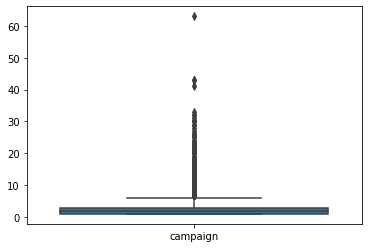

In [18]:
sns.boxplot(data=df[["campaign"]])
plt.show()

In [19]:
#IQR=Q3-Q1
def outliers_campaign(Q3,Q1,IQR):
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_age(3,1,2)

Lower bound: -2.0
Upper bound: 6.0


In [20]:
a3=df["campaign"]
count=0
for i in a3:
    if i>6 or i<-2:
        count=count+1
print("total outliers in campaign are:",count)
percentage_of_campaignoutliers=(count/11162)*100 
print("percentage of campaign outliers are:",percentage_of_campaignoutliers)

total outliers in campaign are: 601
percentage of campaign outliers are: 5.384339724063788


#### We won't drop campaigb outliers since they make up only 5.4% of the total data which is feasible

### 5)PDAYS

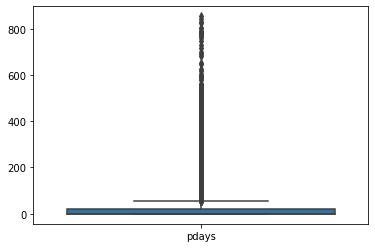

In [21]:
sns.boxplot(data=df[["pdays"]])
plt.show()

In [22]:
#IQR=Q3-Q1
def outliers_pdays(Q3,Q1,IQR):
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_age(20,-1,21)

Lower bound: -32.5
Upper bound: 51.5


In [23]:
a4=df["pdays"]
count=0
for i in a4:
    if i>51.5 or i<-32.5:
        count=count+1
print("total outliers in pdays are:",count)
percentage_of_pdaysoutliers=(count/11162)*100 
print("percentage of pdays outliers are:",percentage_of_pdaysoutliers)

total outliers in pdays are: 2754
percentage of pdays outliers are: 24.67299767066834


#### To remove outlier

In [24]:
# to remove outlier
df.loc[df['pdays'] == -1, 'pdays'] = 999
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,999,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,999,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,999,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,999,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,999,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,999,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,999,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,999,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,999,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,999,0,unknown,yes


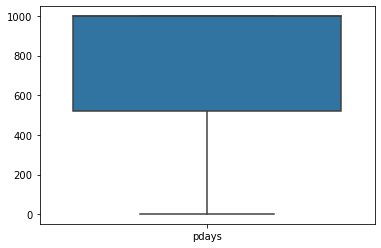

In [25]:
sns.boxplot(data=df[["pdays"]])
plt.show()

In [26]:
df['pdays'].describe()

count    11162.000000
mean       797.074897
std        351.280201
min          1.000000
25%        521.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [27]:
#IQR=Q3-Q1
def outliers_pdays(Q3,Q1,IQR):
    outliers_lowerbound=Q1-(1.5*IQR)
    outliers_upperbound=Q3+(1.5*IQR)
    print("Lower bound:",outliers_lowerbound)
    print("Upper bound:",outliers_upperbound)
outliers_age(999,521,478)

Lower bound: -196.0
Upper bound: 1716.0


In [28]:
a5=df["pdays"]
count=0
for i in a5:
    if i>1716 or i<-196:
        count=count+1
print("total outliers in pdays are:",count)
percentage_of_pdaysoutliers=(count/11162)*100 
print("percentage of pdays outliers are:",percentage_of_pdaysoutliers)

total outliers in pdays are: 0
percentage of pdays outliers are: 0.0


#### We won't drop pdays since after analysis we have removed outliers

### STEP 10:Normalizing and Scaling(there is nothing to normalize or scale)

### STEP 11:Finding coorelation

#### Before finding coorelation we will fine tune data a bit using labelencoder,applying bins and dropping columns

### 1) Dropping columns

#### Considering contact,day and month have no effect on deposit

In [29]:
df.drop(['contact','day','month'], axis=1, inplace=True)

In [30]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,999,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,999,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,999,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,999,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,999,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,562,2,999,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,1201,1,999,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,1030,1,999,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,608,1,999,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,1297,3,999,0,unknown,yes


### 2) Applying bins and doing analysis

#### 2.1)Poutcome

In [31]:
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [32]:
#Taking unknown to be other in poutcome
df['poutcome'] = df['poutcome'].replace(['other'] , 'unknown')

#### 2.2) Job

In [33]:
df['job'] = df['job'].replace(['management', 'admin.'], 'white-collar')
df['job'] = df['job'].replace(['services','housemaid'], 'pink-collar')
df['job'] = df['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

### 3) Label Encoding

In [34]:
df_labelencoder = LabelEncoder()
df['deposit']  = df_labelencoder.fit_transform(df['deposit'])
df['job']  = df_labelencoder.fit_transform(df['job'])
df['marital']  = df_labelencoder.fit_transform(df['marital']) 
df['education']= df_labelencoder.fit_transform(df['education']) 
df['default']  = df_labelencoder.fit_transform(df['default']) 
df['housing']  = df_labelencoder.fit_transform(df['housing']) 
df['loan']     = df_labelencoder.fit_transform(df['loan']) 
df['poutcome'] = df_labelencoder.fit_transform(df['poutcome']) 

df.head(10)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,6,1,1,0,2343,1,0,1042,1,999,0,2,1
1,56,6,1,1,0,45,0,0,1467,1,999,0,2,1
2,41,5,1,1,0,1270,1,0,1389,1,999,0,2,1
3,55,3,1,1,0,2476,1,0,579,1,999,0,2,1
4,54,6,1,2,0,184,0,0,673,2,999,0,2,1
5,42,6,2,2,0,0,1,1,562,2,999,0,2,1
6,56,6,1,2,0,830,1,1,1201,1,999,0,2,1
7,60,2,0,1,0,545,1,0,1030,1,999,0,2,1
8,37,5,1,1,0,1,1,0,608,1,999,0,2,1
9,28,3,2,1,0,5090,1,0,1297,3,999,0,2,1


### Now we plot heatmap

<AxesSubplot:>

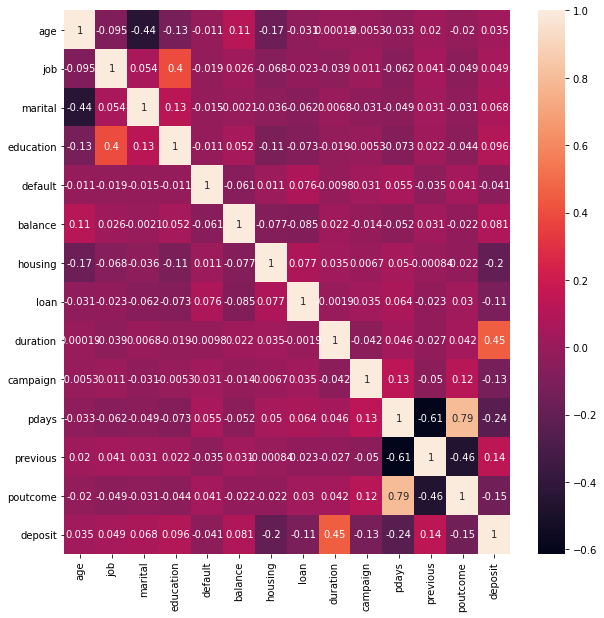

In [35]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df.corr(),annot=True)

# 3- Identify the required data attributes and also explain the purpose of your analysis.

#### Due to negative correlation with deposit we drop the below columns

In [36]:
df.drop(['default','housing','campaign','poutcome','pdays','loan'], axis=1, inplace=True)

#### Due to positive correlation and impact on deposit we select the below columns as df1 and place deposit in df2


In [37]:
df1=df[['age','job','marital','education','previous','duration','balance']]
df2=df['deposit']

# 4- Apply Decision tree on the dataset.

#### Splitting data

In [38]:
data_train, data_test, label_train, label_test = train_test_split(df1, df2, test_size = 0.3, random_state = 50)

#### Applying Decision Tree

In [91]:
i=1
for MAXDEPTH in maxdepth:
    print('The current Decision Tree Depth is:',i+1)
    dt2 = tree.DecisionTreeClassifier(random_state=1,max_depth=i+1)
    dt2.fit(data_train, label_train)
    dt2_score_train = dt2.score(data_train, label_train)
    print("Training score: ",dt2_score_train)
    dt2_score_test = dt2.score(data_test, label_test)
    print("Testing score: ",dt2_score_test)
    i=i+1



The current Decision Tree Depth is: 2
Training score:  0.7106105209266607
Testing score:  0.712750074649149
The current Decision Tree Depth is: 3
Training score:  0.7737104825291181
Testing score:  0.7647058823529411
The current Decision Tree Depth is: 4
Training score:  0.7879175732753104
Testing score:  0.774260973424903
The current Decision Tree Depth is: 5
Training score:  0.7963650326379111
Testing score:  0.777246939384891
The current Decision Tree Depth is: 6
Training score:  0.8004607705106873
Testing score:  0.7790385189608838
The current Decision Tree Depth is: 7
Training score:  0.805836426468706
Testing score:  0.7718722006569125
The current Decision Tree Depth is: 8
Training score:  0.8142838858313068
Testing score:  0.7653030755449388
The current Decision Tree Depth is: 9
Training score:  0.8314347881735569
Testing score:  0.772767990444909
The current Decision Tree Depth is: 10
Training score:  0.8458978625367977
Testing score:  0.7563451776649747
The current Decision Tr

#### We will select Decision Tree with depth 7 because that's the best combination of score since after that we see the Testing score decreases while only Training score increases

In [83]:
dt2 = tree.DecisionTreeClassifier(random_state=1,max_depth=7)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.805836426468706
Testing score:  0.7718722006569125


# 5- Represent the results in form of a) Accuracy and b) Confusion Matrix.

### a) Accuracy

In [84]:
preds = dt2.predict(data_test)

In [85]:
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))


Accuracy score: 
0.7718722006569125


In [92]:
df1.head()

,age,job,marital,education,previous,duration,balance
0,59,6,1,1,0,1042,2343
1,56,6,1,1,0,1467,45
2,41,5,1,1,0,1389,1270
3,55,3,1,1,0,579,2476
4,54,6,1,2,0,673,184


#### Preditction 1:

In [94]:
dt2.predict([[59,6,1,1,9,1042,2343]])

C:\Users\111\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#### Preditction 2:

In [95]:
dt2.predict([[54,6,1,2,0,673,184]])

C:\Users\111\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#### Prediction 3:

In [97]:
dt2.predict([[41,5,1,1,0,1389,1270]])

C:\Users\111\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

### b) Confusion Matrix

In [99]:
confusion_matrix(label_test, preds)

array([[1428,  339],
       [ 425, 1157]], dtype=int64)

In [102]:
print (classification_report(label_test,preds))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1767
           1       0.77      0.73      0.75      1582

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349

